**Import**
Implementing Feedforward neural networks with Keras and TensorFlow a. Import the necessary packages b. Load the training and testing data (MNIST) c. Define the network architecture using Keras d. Train the model using SGD e. Evaluate the network f. Plot the training loss and accuracy

In [1]:
import tensorflow as tf 
from tensorflow import keras
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import random 
%matplotlib inline

**Loading and preparing the data**

MNIST stands for "Modified National Institute of Standards and Technology". It is a dataset of 70,000 handwritten images. Each image is of 28x28 pixels i.e. about 784 features. Each feature represents only one pixel's intensity i.e. from 0(white) to 255(black). This database is further divided into 60,000 training and 10,000 testing images.

In [2]:
#import dataset and split into train and test data 
mnist = tf.keras.datasets.mnist 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
#to see length of training and testing dataset 
print("training " , len(x_train))
print("testing " ,len(x_test))

training  60000
testing  10000


In [4]:
#shape of training dataset 60,000 images having 28*28 size
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

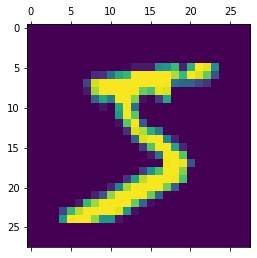

In [7]:
#check first image
plt.matshow(x_train[0])

In [8]:
#normalize the images by scaling pixel intensities to the range 0,1
x_train = x_train / 255 
x_test = x_test / 255

In [9]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

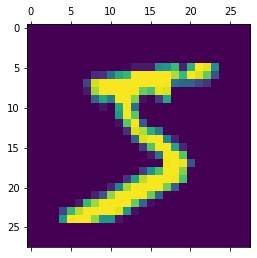

In [10]:
#check first image
plt.matshow(x_train[0])

**Define the network architecture using Keras**

**Creating the model**

The ReLU function is one of the most popular activation functions. It stands for “rectified linear unit”.
Mathematically this function is defined as: y = max(0,x)The ReLU function returns “0” if the input is negative and
is linear if the input is positive.
The softmax function is another activation function. It changes input values into values that reach from 0 to 1.


In [11]:
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28, 28)),
keras.layers.Dense(128, activation='relu'),
keras.layers.Dense(100, activation='relu'),
keras.layers.Dense(90, activation='relu'),
keras.layers.Dense(10, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 100)               12900     
                                                                 
 dense_2 (Dense)             (None, 90)                9090      
                                                                 
 dense_3 (Dense)             (None, 10)                910       
                                                                 
Total params: 123,380
Trainable params: 123,380
Non-trainable params: 0
_________________________________________________________________


**Compile the model**

In [13]:
model.compile(optimizer='sgd',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

Train the model

In [14]:
history=model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6127 - accuracy: 0.8286 - val_loss: 0.2914 - val_accuracy: 0.9158
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2673 - accuracy: 0.9220 - val_loss: 0.2201 - val_accuracy: 0.9340
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2097 - accuracy: 0.9389 - val_loss: 0.1868 - val_accuracy: 0.9414
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1716 - accuracy: 0.9500 - val_loss: 0.1535 - val_accuracy: 0.9535
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1459 - accuracy: 0.9571 - val_loss: 0.1428 - val_accuracy: 0.9578
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1259 - accuracy: 0.9642 - val_loss: 0.1248 - val_accuracy: 0.9613
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1109 - accuracy: 0.9677 - val_loss: 0.1114 - val_accuracy:

Evaluate model

In [15]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)


313/313 [==============================] - 1s 2ms/step - loss: 0.0932 - accuracy: 0.9703
Loss=0.093
Accuracy=0.970


New data pred

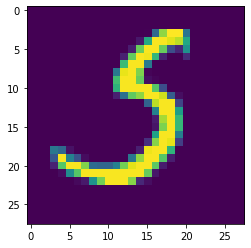

In [16]:
n=random.randint(0,9999)
plt.imshow(x_test[n])

In [17]:
#we use predict() on new data
predicted_value=model.predict(x_test)
print("Handwritten number in the image is %d" %np.argmax(predicted_value[n]))

313/313 [==============================] - 1s 2ms/step
Handwritten number in the image is 5


Plot graph for Accuracy and Loss

In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

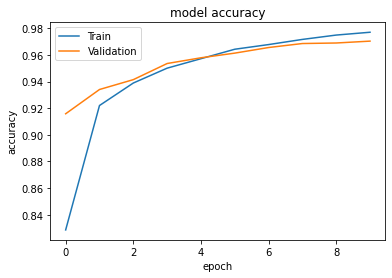

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

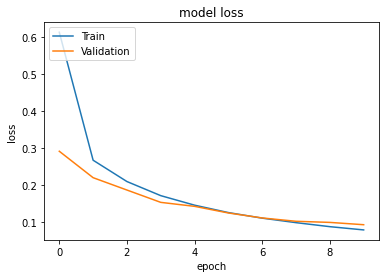

In [20]:
plt.plot (history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.title('model loss') 
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend (['Train', 'Validation'], loc='upper left') 
plt.show()